In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("D:\csvFiles\predictive_maintenance.csv")

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df["Failure Type"].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [5]:
df.isnull().values.any()

False

In [6]:
df["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

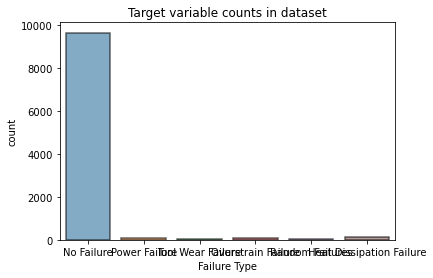

In [7]:
sns.countplot(data= df, x= "Failure Type", alpha= 0.6, edgecolor="0", linewidth=1.5)
plt.title('Target variable counts in dataset')
plt.show()

## ML Model - k-Nearest Neighbours 

In [8]:
df["Failure Type"] = df["Failure Type"].map({"No Failure":0, "Power Failure":1, "Overstrain Failure":2, "Random Failures":3, "Heat Dissipation Failure":4, "Tool Wear Failure":5}).astype(int)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0


In [9]:
x = df.drop(["Failure Type","UDI","Product ID","Type"], axis=1)
y = df["Failure Type"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()

In [11]:
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

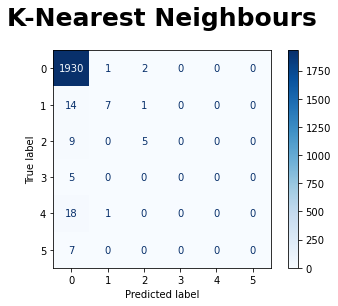

In [12]:
cm = confusion_matrix(y_test, ypred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("K-Nearest Neighbours", pad= 25, fontsize= 25, fontweight= "bold")
plt.show()

In [13]:
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1933
           1       0.78      0.32      0.45        22
           2       0.62      0.36      0.45        14
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00         7

    accuracy                           0.97      2000
   macro avg       0.40      0.28      0.32      2000
weighted avg       0.95      0.97      0.96      2000



C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
df.shape

(10000, 10)

In [15]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                 int32
dtype: object

In [16]:
print("Accuracy : ", accuracy_score(y_test, ypred))

Accuracy :  0.971
